# Mini projeto (Guia de Análise Exploratória de Dados com Python e Linguagem SQL) do curso gratuito "Python Fundamentos" da Data Science Academy

Realizado no mês 02/2022

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())


Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


Vários pacotes python disponíveis para busca:
<https://pypi.org/>

O pacote do IMDb que será utilizado nesse mini projeto:
<https://pypi.org/project/imdb-sqlite/>


In [2]:
# Instala o pacote
# https://pypi.org/project/pycountry/
# -q faz a instalção "silenciosa" - sem devolver escritos
!pip install -q imdb-sqlite

In [3]:
# Instala o pacote
# https://pypi.org/project/pycountry/
# Permite que obtenha nomes de países pelos códigos sem ter que fazer isso manualmente
!pip install -q pycountry

In [4]:
# Imports
# Pacote de expressões regulares (re) - utilizado principalmente quando se tem que processar texto
import re
# time - medir o tempo de execução ou trabalhar com datas
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
# Sklearn - Machine Learning em Python
from sklearn.feature_extraction.text import CountVectorizer
import warnings
# Filtrando os 'warnings' para despoluir o notebook
warnings.filterwarnings("ignore")
# Já define, como padrão, o grid com fundo branco para todos os gráficos
sns.set_theme(style = "whitegrid")

# Carregando os dados

In [ ]:
# Executando no sistema operacional o download dos arquivos
!imdb-sqlite

In [12]:
# Conectando com o banco de dados
conn = sqlite3.connect("imdb.db")

In [13]:
# Extraindo a lista de tabelas que tem no banco de dados
# sqlite_master é uma tabela de catálogo do SQLite
# Selecionar nomes, chamar de 'Table_Name', retirar da tabela de catálogo, onde o tipo é 'table'
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [14]:
# Conferindo o tipo do objeto
type(tabelas)

pandas.core.frame.DataFrame

In [16]:
# Visualiza o resultado
# Mostra as tabelas que tem no banco de dados
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [17]:
# Convertendo o dataframe em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [18]:
# Percorrendo a lista de tabelas no banco de dados e extrair o esquema de cada uma
# Para cada tabela na lista de tabelas, vai buscar os detalhes da tabela
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




# 01. Quais são as categorias de filmes mais comuns no IMDB?

Quais são os principais tipos (categorias) dos títulos (filmes)?

In [19]:
# Primeiro, precisa-se obter uma visão geral.
# Criando a consulta SQL
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type''' 

In [20]:
# Extrai o resultado da consulta
resultado1 = pd.read_sql_query(consulta1, conn)

In [21]:
# Visualiza o resultado da consulta
display(resultado1)

,type,COUNT
0,movie,600706
1,short,853873
2,tvEpisode,6476198
3,tvMiniSeries,41865
4,tvMovie,134744
5,tvPilot,2
6,tvSeries,220371
7,tvShort,10451
8,tvSpecial,35816
9,video,257278


In [22]:
# Calculando o percentual para cada tipo
# Os dados em percentual são amplamente utilizados e podem ser muito mais práticos
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [23]:
# Visualizando o resultado
display(resultado1)

,type,COUNT,percentual
0,movie,600706,6.935246
1,short,853873,9.858100
2,tvEpisode,6476198,74.768736
3,tvMiniSeries,41865,0.483338
4,tvMovie,134744,1.555641
5,tvPilot,2,0.000023
6,tvSeries,220371,2.544218
7,tvShort,10451,0.120658
8,tvSpecial,35816,0.413501
9,video,257278,2.970315


In [24]:
# Criando um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Criando um dicionário vazio
others = {}

# Filtrando o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Gravando o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajustando o nome
others['type'] = 'others'

# Qualquer categoria com menos de 5% entra em 'others'

In [25]:
# Visualizando
others

{'COUNT': 730862, 'percentual': 8.43791804299394, 'type': 'others'}

In [26]:
# Filtrando o dataframe de resultado acima de 5%
resultado1 = resultado1[resultado1['percentual'] > 5]

In [27]:
# Append com o dataframe de outras categorias (others)
resultado1 = resultado1.append(others, ignore_index = True)

In [28]:
# Ordenando o resultado
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [29]:
# Visualizando
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6476198,74.768736
1,short,853873,9.858100
3,others,730862,8.437918
0,movie,600706,6.935246


In [30]:
# Ajustanado os labels 
# Para cada i no idex de resultado1
# retornar o percentual com duas casas decimais junto com o nome da categoria
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

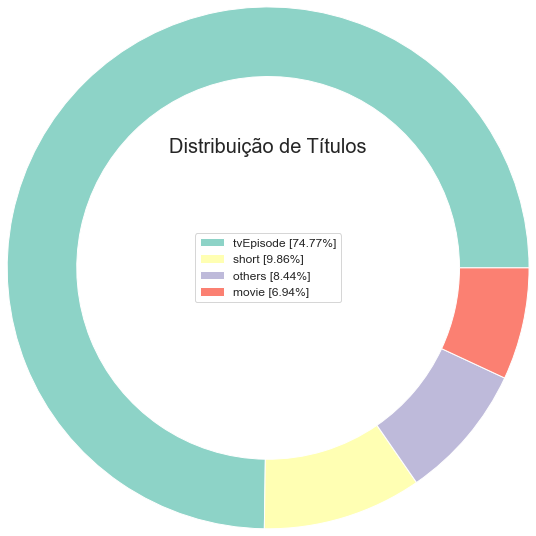

In [31]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot (Gráfico de pizza transformado em rosca)
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

# 02. Qual o número de títulos por gênero?

In [32]:
# Criando a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 

In [33]:
# Aplicando a consulta no banco de dados
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [34]:
# Visualizando o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,13777
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1449,"Thriller,Western",42
1450,War,1286
1451,"War,Western",14
1452,Western,5085


In [35]:
# Convertendo as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [36]:
# Removendo valores NA (ausentes)
temp = resultado2['genres'].dropna()

In [37]:
# Criando um vetor usando expressão regular para filtrar as strings
# O CountVectorizer foi importado no começo
''' 
Ele tranforma uma coluna com vários dados repetidos, em uma matriz
com as ocorrências na linha.
Ex:     
        Color               Red    Yellow    Green
        red                  1        0        0
        red                  1        0        0
        yellow     ->        0        1        0  
        green                0        0        1
        yellow               0        1        0
'''

# Documentação da expressão regular:
# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

# Documentação:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [38]:
ype(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [40]:
# Aplicando a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [41]:
# Agora, é uma matriz esparsa do pacote scipy
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [42]:
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names()

In [43]:
# Crian o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [49]:
# Visualizando
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1453
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1454 non-null   int64
 1   adult        1454 non-null   int64
 2   adventure    1454 non-null   int64
 3   animation    1454 non-null   int64
 4   biography    1454 non-null   int64
 5   comedy       1454 non-null   int64
 6   crime        1454 non-null   int64
 7   documentary  1454 non-null   int64
 8   drama        1454 non-null   int64
 9   family       1454 non-null   int64
 10  fantasy      1454 non-null   int64
 11  film-noir    1454 non-null   int64
 12  game-show    1454 non-null   int64
 13  history      1454 non-null   int64
 14  horror       1454 non-null   int64
 15  music        1454 non-null   int64
 16  musical      1454 non-null   int64
 17  mystery      1454 non-null   int64
 18  news         1454 non-null   int64
 19  reality-tv   1454 non-null   int64
 20  romance 

In [ ]:
# Drop da coluna n
generos = generos.drop(columns = 'n', axis = 0)

In [51]:
# Calculando o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [52]:
# Visualizando
generos_percentual.head(10)

drama          18.225585
comedy         16.918845
documentary    15.887208
adventure      14.855571
action         14.374140
romance        13.342503
crime          13.067400
mystery        12.517194
thriller       12.242091
fantasy        12.173315
dtype: float64

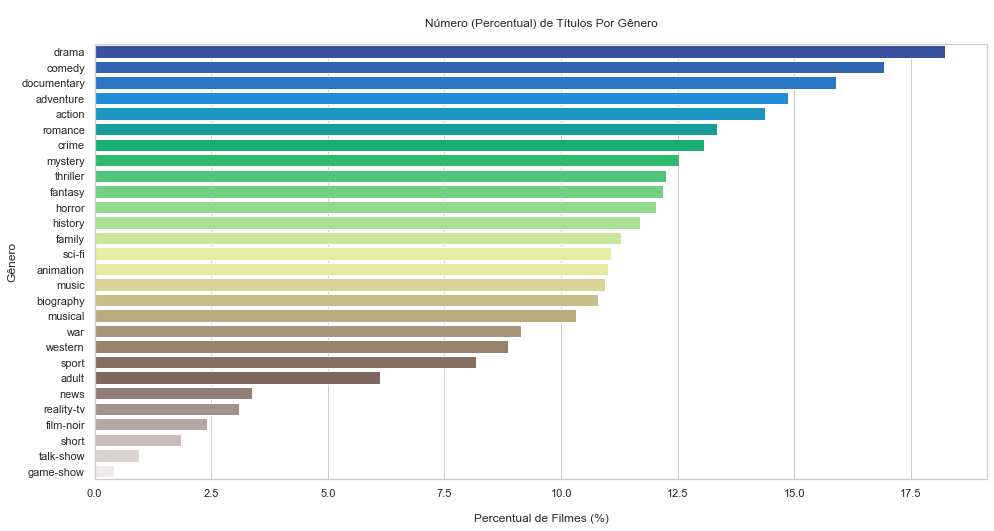

In [53]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()